# NASA FRIMS Fire Data Visualization
---

Dataset retreived from NRT VIIRS 375 m Active Fire product VNP14IMGT distributed from NASA FIRMS.
>Please see `NASA-FIRMS_fetch.ipynb` for data scraping and `NASA_FIRMS_merge.ipynb` for data scrubbing


In [2]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as cmaps
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.colors import Normalize as norm
from matplotlib.colors import LogNorm as logn

## 1 Set Variables and Load Data
---

### 1.1 Set Fixed Notebook Variables and Create Daterange

In [3]:
# global variables
crs = 4326 # coordinate reference system - EPSG:4326 WGS84 - World Geodetic System 1984, used in GPS
# month list as %Y-%m
dt = [f'{str(x.date())}'[0:7] for x in pd.date_range("2013-01-01", "2024-07-09", freq="ME")]

### 1.2 Load Shapes

In [4]:
# Load ca boundary/bounding box/grid shape file
ca_bd = gpd.read_file('../outputs/shapes/ca_shape.geojson')
ca_bbox = gpd.read_file('../outputs/shapes/ca_bbox.geojson')
ca_gdf = gpd.read_file('../outputs/shapes/ca_grid.geojson')

### 1.3 Load Fire Data

In [5]:
# Read NASA FIRMS fire data for year
fire_df = pd.read_csv(f'../outputs/nasa-firms/all.csv')[['acq_date','latitude','longitude','frp']]

## 2 Parse Data
---

### 2.1 Parse Fire Data

In [6]:
# Create GeoDataframe from Dataframe and add count column
fire_gdf = gpd.GeoDataFrame(fire_df[['acq_date','frp']], geometry = gpd.points_from_xy(fire_df.longitude,fire_df.latitude), crs=crs)
fire_gdf.insert(2,'cnt',1)

In [7]:
# sjoin to filter fire data points within ca state boundary
ca_fire_gdf = gpd.sjoin(fire_gdf,ca_gdf, how='left', predicate='within').dropna()

In [14]:
filter = ca_fire_gdf['index_right'].unique().astype('int')

In [15]:
ca_gdf.loc[filter,:].to_file('../outputs/nasa-firms/geojson/ca_fire_GES_grids.geojson', driver='GeoJSON')

In [16]:
ca_fire_gdf[['acq_date','frp','cnt','index_right']].to_csv('../outputs/nasa-firms/geojson/ca_fire_GES_data.csv')

### 2.2 

In [8]:
# variables to store
ca_gdf_dict = {}
# Loop through months and output fire plots
for d in dt:
    # Group Fire by month
    fire_mo_gdf = ca_fire_gdf.loc[ca_fire_gdf['acq_date'].str[0:7] == d][['index_right','frp','cnt','geometry']] #length is ttl incidents in set
    # Dissolve on sum of values
    dissolve = fire_mo_gdf.dissolve(by='index_right', aggfunc='sum') #grouped points in active fire grids of incidents in ca
    # Store ca geodataframe to dict
    ca_gdf_dict[d] = dissolve

In [11]:
fire_season = {
    '2013':dt[0:11],  #01-11
    '2014':dt[11:23], #12-11
    '2015':dt[23:36], #12-12
    '2016':dt[36:48], #01-12
    '2017':dt[48:62], #01-02
    '2018':dt[62:73], #03-01
    '2019':dt[73:83], #02-11
    '2020':dt[83:96], #
    '2021':dt[96:108],
    '2022':dt[108:122],
    '2023':dt[122:134],
}

In [12]:
fire_season

{'2013': ['2013-01',
  '2013-02',
  '2013-03',
  '2013-04',
  '2013-05',
  '2013-06',
  '2013-07',
  '2013-08',
  '2013-09',
  '2013-10',
  '2013-11'],
 '2014': ['2013-12',
  '2014-01',
  '2014-02',
  '2014-03',
  '2014-04',
  '2014-05',
  '2014-06',
  '2014-07',
  '2014-08',
  '2014-09',
  '2014-10',
  '2014-11'],
 '2015': ['2014-12',
  '2015-01',
  '2015-02',
  '2015-03',
  '2015-04',
  '2015-05',
  '2015-06',
  '2015-07',
  '2015-08',
  '2015-09',
  '2015-10',
  '2015-11',
  '2015-12'],
 '2016': ['2016-01',
  '2016-02',
  '2016-03',
  '2016-04',
  '2016-05',
  '2016-06',
  '2016-07',
  '2016-08',
  '2016-09',
  '2016-10',
  '2016-11',
  '2016-12'],
 '2017': ['2017-01',
  '2017-02',
  '2017-03',
  '2017-04',
  '2017-05',
  '2017-06',
  '2017-07',
  '2017-08',
  '2017-09',
  '2017-10',
  '2017-11',
  '2017-12',
  '2018-01',
  '2018-02'],
 '2018': ['2018-03',
  '2018-04',
  '2018-05',
  '2018-06',
  '2018-07',
  '2018-08',
  '2018-09',
  '2018-10',
  '2018-11',
  '2018-12',
  '2019-01'

In [199]:
ca_gdf_dict["2023-01"]

,geometry,frp,cnt
index_right,,,
115.0,"MULTIPOINT (-123.82205 40.43659, -123.82088 40...",8.82,2
119.0,POINT (-123.87157 40.86136),0.91,1
128.0,POINT (-123.86824 41.72695),1.83,1
148.0,POINT (-123.77536 40.50111),3.27,1
235.0,POINT (-123.43069 39.09341),0.83,1
...,...,...,...
4498.0,POINT (-114.65746 33.61657),1.76,1
4511.0,POINT (-114.64434 34.95383),3.20,1
4519.0,POINT (-114.58250 33.66717),6.63,1


### 1.1 Parse Data by Year

In [122]:
# aggregate frp and cnt data using sum
fire_by_year = fire_grid_gdf.dissolve(by='index_right', aggfunc='sum')
# put data into ca grid file
yr_gdf = gpd.GeoDataFrame({'grid_index':[int(x) for x in dissolve_yr.index], 'frp':dissolve_yr.frp.values, 'cnt':dissolve_yr.cnt.values},
                         geometry = ca_gdf.geometry[dissolve_yr.index].to_list(), crs=crs)

In [ ]:
yr_gdf.to_file(f'../outputs/geojson/{yr}.geojson', driver='GeoJSON')

In [155]:
dissolve_yr

,geometry,acq_date,frp,cnt
index_right,,,,
8.0,"MULTIPOINT (-124.35537 40.27164, -124.35423 40...",2021-01-202021-01-202021-01-202021-01-212021-0...,80.99,8
10.0,"MULTIPOINT (-124.39342 40.44680, -124.38927 40...",2021-05-122022-01-282022-02-052022-02-112022-0...,40.84,7
20.0,"MULTIPOINT (-124.22884 40.31553, -124.22882 40...",2022-11-172022-11-172022-11-172022-11-172022-1...,143.74,16
23.0,"MULTIPOINT (-124.29147 40.67811, -124.28948 40...",2021-08-012021-08-012022-10-26,22.19,3
38.0,POINT (-124.17779 40.22610),2021-04-22,15.25,1
...,...,...,...,...
4544.0,"MULTIPOINT (-114.44494 34.62154, -114.44244 34...",2021-07-222021-07-222021-07-222021-07-22,137.04,4
4546.0,"MULTIPOINT (-114.32327 34.13988, -114.32114 34...",2021-02-172021-02-172021-02-172021-02-172021-0...,280.81,13
4549.0,"MULTIPOINT (-114.37373 34.45588, -114.37225 34...",2021-03-072021-03-08,11.59,2


## 2 Plot Data
---

In [4]:
# set custom colomap
afmhot = cmaps['afmhot']
afmhot2 = lcmap(afmhot(np.linspace(0.1, 0.7, 256)))

### 1.1 NRT VIIRS 375 m Active Fires in California by Year

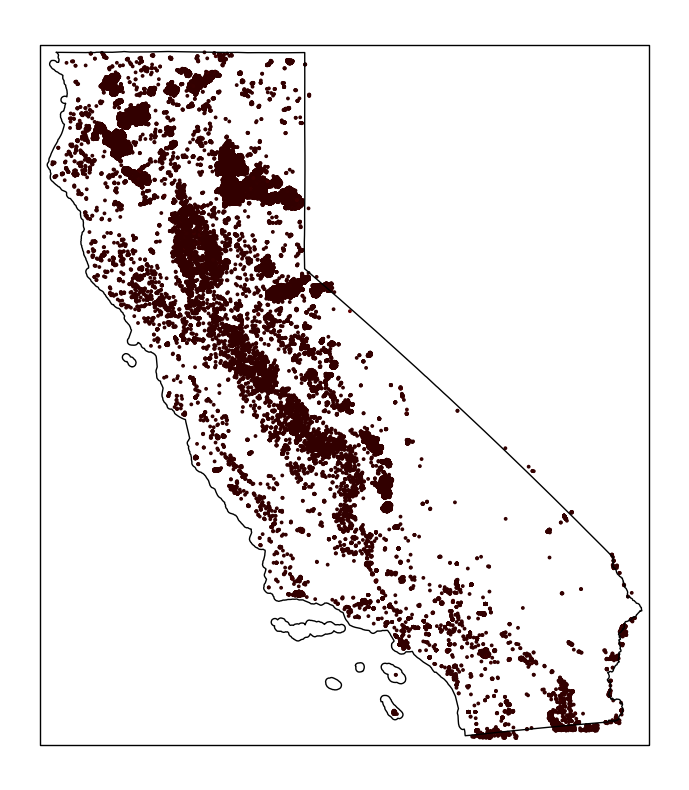

In [123]:
ax = fire_grid_gdf.plot(markersize=3, figsize=(11,10), column='frp', cmap=afmhot2)
ca = ca_bd.to_crs(crs=4326).plot(ax =ax, color='none', edgecolor='black')
bbox = ca_bbox.to_crs(crs=4326).plot(ax =ax, color='none', edgecolor='black')
ax.axis('off')
plt.show()

### 1.3 Filter Fire Data Using `sjoin` and Aggregate Data Using `dissolve`

In [118]:
fire_grid_gdf

,acq_date,frp,cnt,geometry,index_right
0,2021-01-01,0.82,1,POINT (-120.79471 38.97647),1699.0
1,2021-01-01,1.31,1,POINT (-120.79939 38.97713),1699.0
2,2021-01-01,0.77,1,POINT (-120.42873 39.63995),1940.0
3,2021-01-01,1.05,1,POINT (-122.29529 39.75401),763.0
6,2021-01-01,0.61,1,POINT (-121.67836 37.18509),1082.0
...,...,...,...,...,...
31966,2022-12-31,0.75,1,POINT (-116.85279 34.35405),3753.0
31967,2022-12-31,1.06,1,POINT (-117.33712 34.60538),3529.0
31968,2022-12-31,0.88,1,POINT (-117.33553 34.61052),3529.0
31969,2022-12-31,0.76,1,POINT (-120.06644 36.53987),2227.0


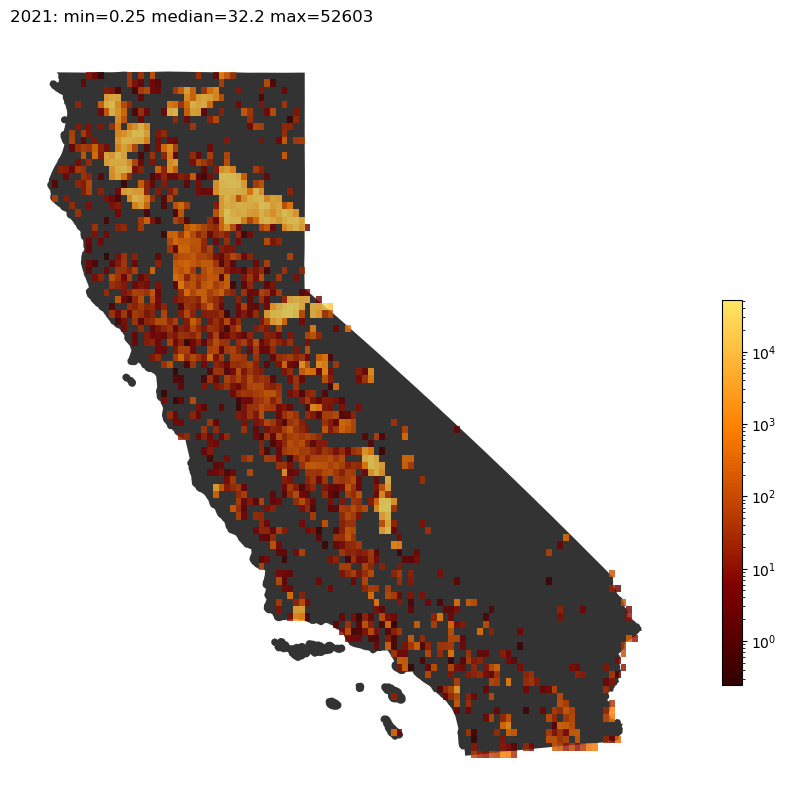

In [74]:
v1 = [yr_gdf.frp.values.min(),yr_gdf.frp.values.max()]
# set norm to implement logarithmic scale for color mapping
n1 = logn(vmin=v1[0], vmax=v1[1])
# set axis and plot
ax = yr_gdf.plot(figsize=(11,10), column='frp', cmap=afmhot2, alpha=0.8, markersize=1, 
                  vmin=v1[0], vmax=v1[1], norm=n1, zorder=2)
ax.axis('off')
ca = ca_bd.to_crs(crs=4326).plot(ax=ax, color='#333', zorder=1) # Plot state boundary
bbox = ca_bbox.to_crs(crs=4326).plot(ax =ax, color='none', edgecolor='none')

plt.colorbar(cm.ScalarMappable(norm=n1, cmap=afmhot2), ax=ax,
             location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
plt.title(f'{yr}: min={v1[0]:.{2}f} median={np.median(yr_gdf.frp.values):.{1}f} max={v1[1]:.{0}f}', loc='left')
ax.axis('off')
# plt.savefig(f'../outputs/nasa-firms/images/frp_{yr}.png')
plt.show()

In [810]:
ca_gdf.loc[dissolve.index, 'cnt'] = df.to_csv(f'../outputs/geojson/ca_fire_all.csv')

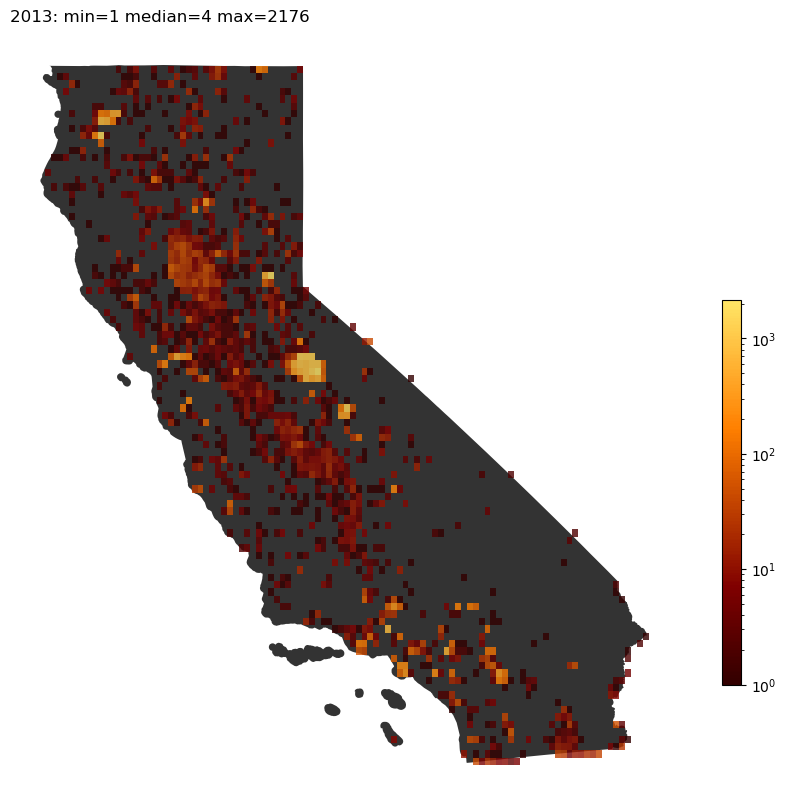

In [811]:
v2 = [dissolve.cnt.values.min(),dissolve.cnt.values.max()]
n2 = logn(vmin=v2[0], vmax=v2[1])
ax2 = ca_gdf.plot(figsize=(11,10), column='cnt', cmap=afmhot2, alpha=0.8, markersize=1, 
                  vmin=v2[0], vmax=v2[1], norm=n2, zorder=2)
ax2.axis('off')
ca = ca_bd.to_crs(crs=4326).plot(ax=ax2, color='#333', zorder=1) # Plot state boundary
plt.colorbar(cm.ScalarMappable(norm=n2, cmap=afmhot2), ax=ax2,
             location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
plt.title(f'{yr}: min={v2[0]} median={np.median(dissolve2.cnt.values):.{0}f} max={v2[1]}', loc='left')
# ax2.axis('off')
plt.savefig(f'../outputs/nasa-firms/images/cnt_{yr}.png')
plt.show()

In [792]:
# Set cmap scale
n1 = logn(vmin=0.08, vmax=round(v1[1]+500,-3))
if v1[1]>35000: n1 = logn(vmin=0.08, vmax=round(v1[1]+5000,-4))
n2 = logn(vmin=1, vmax=round(v2[1]+50,-2))

In [17]:
ca_gdf_dict

{'2013-01':                                                geometry  frp  cnt  frp/cnt
 0     POLYGON ((-124.40000 40.20000, -124.40000 40.3...  NaN  NaN      NaN
 1     POLYGON ((-124.40000 40.30000, -124.40000 40.4...  NaN  NaN      NaN
 2     POLYGON ((-124.40000 40.40000, -124.40000 40.5...  NaN  NaN      NaN
 3     POLYGON ((-124.40000 40.50000, -124.40000 40.6...  NaN  NaN      NaN
 4     POLYGON ((-124.40000 40.60000, -124.40000 40.7...  NaN  NaN      NaN
 ...                                                 ...  ...  ...      ...
 4552  POLYGON ((-114.20000 34.20000, -114.20000 34.3...  NaN  NaN      NaN
 4553  POLYGON ((-114.20000 34.30000, -114.20000 34.4...  NaN  NaN      NaN
 4554  POLYGON ((-114.20000 34.40000, -114.20000 34.5...  NaN  NaN      NaN
 4555  POLYGON ((-114.10000 34.20000, -114.10000 34.3...  NaN  NaN      NaN
 4556  POLYGON ((-114.10000 34.30000, -114.10000 34.4...  NaN  NaN      NaN
 
 [4557 rows x 4 columns],
 '2013-02':                                      

In [196]:
# Create Plots
for d in dt:
    for c in ['frp']: #,'cnt','frp/cnt']
        # Plot ca cells
        ax = ca_gdf_dict[d].plot(figsize=(11,10), column=c, cmap=afmhot2, alpha=0.8,
                                 markersize=1, vmin=0.07, vmax=52558.2, norm=n1, zorder=3)
        ax.axis('off')
        ca = ca_bd.to_crs(crs=4326).plot(ax=ax, color='#333', zorder=2) # Plot state boundary
        bbox = ca_bbox.to_crs(crs=4326).plot(ax=ax, color='#fff', zorder=1) # Plot bounding box
        plt.colorbar(cm.ScalarMappable(norm=n1, cmap=afmhot2), ax=ax, 
                     location='right', anchor=(0, 0.3), shrink=0.5) # Configure colorbar
        v = ca_gdf_dict[d][c]
        plt.title(f'{d}: min={v.min():.{2}f} median={np.median(v):.{1}f} max={v.max():.{0}f}', loc='left')
        plt.savefig(f'../outputs/nasa-firms/images/{c}/{c}_{d}.png')
        plt.close()

In [794]:
st_frp_df.to_csv(f'../outputs/nasa-firms/boxplot/frp/{yr}.csv',index=False)
st_cnt_df.to_csv(f'../outputs/nasa-firms/boxplot/cnt/{yr}.csv',index=False)